## PART 1: MEME Implementation (50 points)

(A) After 1 iteration of the MEME algorithm, what is your Probability Weighted Matrix (PWM) for example 1 and example 2? (10 points)

For example 1: 

|   | Background | 1     | 2     | 3     | 4     | 5     |
|---|------------|-------|-------|-------|-------|-------|
| A | 0.234      | 0.585 | 0.043 | 0.051 | 0.06  | 0.09  |
| C | 0.297      | 0.068 | 0.073 | 0.829 | 0.848 | 0.124 |
| G | 0.192      | 0.046 | 0.048 | 0.049 | 0.03  | 0.558 |
| T | 0.277      | 0.301 | 0.836 | 0.071 | 0.062 | 0.228 |

For example 2: 

The PWM after step 1 looks like this. This is for the most likely motif which is **TTTCTGGGAAAA**. Most likely, meaning that the log likelihood was the highest for the given motif.

|   | Background  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| A  | 0.275  | 0.186  | 0.157  | 0.128  | 0.095  | 0.071  | 0.073  | 0.229  | 0.233  | 0.849  | 0.802  | 0.591  | 0.447
| C  | 0.245  | 0.307  | 0.054  | 0.07  | 0.755  | 0.216  | 0.059  | 0.055  | 0.13  | 0.03  | 0.05  | 0.062  | 0.245
| G  | 0.244  | 0.124  | 0.062  | 0.213  |  0.057 | 0.043  | 0.579  | 0.67  | 0.575  | 0.047  | 0.084  | 0.199  | 0.101
| T  | 0.236  | 0.383  | 0.727  | 0.589  |  0.093 | 0.67  | 0.29  | 0.046  | 0.062  | 0.074  | 0.064  | 0.148  | 0.207

(B) In the end, what is the final Probability Weighted Matrix (PWM) that you 
get for example 1 and for example 2? What is the difference from part (A)? (5 
points)

For example 1:

|   | Background | 1     | 2     | 3     | 4    | 5     |
|---|------------|-------|-------|-------|------|-------|
| A | 0.244      | 0.516 | 0.023 | 0.021 | 0.02 | 0.106 |
| C | 0.293      | 0.02  | 0.04  | 0.936 | 0.94 | 0.061 |
| G | 0.2        | 0.02  | 0.02  | 0.021 | 0.02 | 0.534 |
| T | 0.263      | 0.444 | 0.917 | 0.022 | 0.02 | 0.299 |

For example 2:

|   | Background  | 1  | 2  | 3  | 4  | 5  | 6  | 7  | 8  | 9  | 10 | 11 | 12|
|---|---|---|---|---|---|---|---|---|---|---|---|---|---|
| A  | 0.273  | 0.207  | 0.119  | 0.102  | 0.108  | 0.067  | 0.076  | 0.268  | 0.27  | 0.902  | 0.905  | 0.534  | 0.37
| C  | 0.243  | 0.409  | 0.011  | 0.028  | 0.784  | 0.295  | 0.011  | 0.011  | 0.176  | 0.012  | 0.016  | 0.04  | 0.3
| G  | 0.244  | 0.118  | 0.043  | 0.284  |  0.039 | 0.02  | 0.594  | 0.709  | 0.532  | 0.02  | 0.067  | 0.224  | 0.11
| T  | 0.24  | 0.266  | 0.826  | 0.587  |  0.068 | 0.618  | 0.319  | 0.012  | 0.021  | 0.066  | 0.012  | 0.202  | 0.22


**The difference is that the numbers fluctuate slightly. There is no noticeable pattern in the fluctuation.**

(C) Please make a plot of the log likelihood for each iteration (when the threshold = 1e3). (5 points)

In [16]:
import matplotlib.pyplot as plt

In [15]:
example1_log = [
    -1348.1601219735924,
    -1333.6944557436545,
    -1329.7326471738804,
    -1328.9966429589174,
    -1328.8690668747452,
    -1328.8462295819093,
    -1328.8419697505458,
    -1328.8411495152582
]

In [27]:
example2_log = [
    -6732.672772628884,
    -6696.466425661167,
    -6691.184591830176,
    -6690.139581976456,
    -6689.862652801005,
    -6689.778098728507,
    -6689.749369596387,
    -6689.7383055431965,
    -6689.733292808591,
    -6689.730525447962,
    -6689.728664012714,
    -6689.727204879536,
    -6689.725947260619,
    -6689.7248068476965,
    -6689.723746424467,
    -6689.722748578894,
]


In [24]:
def plot_log(log, title):
    # plot the log of the loss
    plt.plot(log)

    # label the axes
    plt.xlabel("Iteration")
    plt.ylabel("Log of loss")

    # add a title
    plt.title(title)

    plt.show()

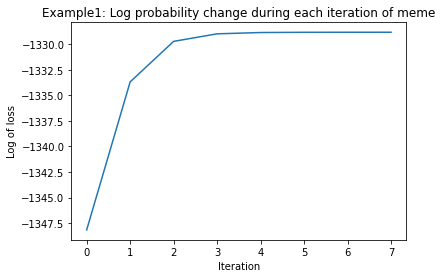

In [25]:
title = "Example1: Log probability change during each iteration of meme"
plot_log(example1_log, title)

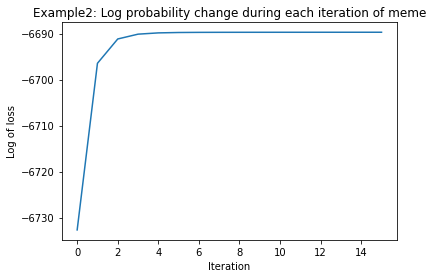

In [28]:
title = "Example2: Log probability change during each iteration of meme"
plot_log(example2_log, title)

## PART 2: Gibbs Sampling (25 points)

Suppose that you are running the Gibbs sampling algorithm for motif finding on a set
of 10 input sequences with a motif width of 4 nucleotides. Further, suppose that the
current state of the Gibbs sampler is as shown below, with the motif occurrences
indicated by the underlined nucleotides.

![](gibbs.png)

(A) Suppose that in the next iteration of the sampler, sequence 3 is picked and the
motif position in that sequence is to be resampled. Compute the parameter
estimates, p, that are calculated in the predictive update step, given that
sequence 3 has been selected. Use a pseudocount of 1 for your estimates and
assume a standard PWM model that does not incorporate any prior knowledge.
Be sure to give the estimates for both the PWM and background parameters. (10
points)

Start by counting the characters in the current state

|   |  Background | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|
| A | 11  | 1  | 5  | 0  |  1 |
| C | 8  | 5  | 0  | 1  | 3  |
| G | 12  | 2  | 1  | 7  | 3  |
| T | 5  | 1  | 3  | 1  | 2  |

The formula for a motif position when k = 0

$p_{c, 0} = \frac{n_{c, 0} + d_c}{(N - 1)(L - W) + d_b}$

where N is the number of sequences = 10

$d_c = 1$, $d_b = 4$, $W = 4$, $L = 8$, $n_{c, k} =$ the  value  in  the  table  above

The formula for a motif position when k > 0

$p_{c,k} = \frac{n_{c,k} + d_c}{N - 1 + d_b}$

where N is the number of sequences = 10

$d_c = 1$, $d_b = 4$, $n_{c, k} =$ the  value  in  the  table  above

e.g.

$p_{A, 0} = \frac{11 + 1}{9 * 4 + 4}$ = $0.3$

$p_{A, 1} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{A, 2} = \frac{5 + 1}{9 + 4}$ = $0.462$

$p_{A, 3} = \frac{0 + 1}{9 + 4}$ = $0.077$

$p_{A, 4} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{C, 0} = \frac{8 + 1}{9 * 4 + 4}$ = $0.225$

$p_{C, 1} = \frac{5 + 1}{9 + 4}$ = $0.462$

$p_{C, 2} = \frac{0 + 1}{9 + 4}$ = $0.077$

$p_{C, 3} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{C, 4} = \frac{3 + 1}{9 + 4}$ = $0.308$

$p_{G, 0} = \frac{12 + 1}{9 * 4 + 4}$ = $0.325$

$p_{G, 1} = \frac{2 + 1}{9 + 4}$ = $0.23$

$p_{G, 2} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{G, 3} = \frac{7 + 1}{9 + 4}$ = $0.615$

$p_{G, 4} = \frac{3 + 1}{9 + 4}$ = $0.308$

$p_{T, 0} = \frac{5 + 1}{9 * 4 + 4}$ = $0.15$

$p_{T, 1} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{T, 2} = \frac{3 + 1}{9 + 4}$ = $0.308$

$p_{T, 3} = \frac{1 + 1}{9 + 4}$ = $0.154$

$p_{T, 4} = \frac{2 + 1}{9 + 4}$ = $0.23$

(B) Given the parameter estimates you computed in (A), compute the probability
that position 2 will be selected as the start of the motif occurrence in sequence 6
(which corresponds to a motif occurrence of CGGC). (5 points)

Because there are 5 possible starting positions, the probability that position 2 will be selected as the start of the motif occurrence in sequence 6 is given by the following formula:

$P = \frac{LR(position=2)}{LR(position=1) + LR(position=2) + LR(position=3) + LR(position=4) + LR(position=5)}$

The motif that we get when position = 2 is CGGC

$LR(position=2, CGGC) = \frac{p_{C, 1} * p_{G, 2} * p_{G, 3} * p_{C, 4}}{p_{C, 0} * p_{G, 0} * p_{G, 0} * p_{C, 0}}$ = $\frac{0.462 * 0.154 * 0.615 * 0.308}{0.225 * 0.325 * 0.325 * 0.225}$ = $2.514$

$LR(position=1, GCGG) = \frac{p_{G, 1} * p_{C, 2} * p_{G, 3} * p_{G, 4}}{p_{G, 0} * p_{C, 0} * p_{G, 0} * p_{G, 0}}$ = $\frac{0.23 * 0.077 * 0.615 * 0.308}{0.325 * 0.225 * 0.325 * 0.325}$ = $0.435$

$LR(position=3, GGCA) = 0.118$

$LR(position=4, GCAG) = 0.059$

$LR(position=5, CAGT) = 9.189$

Plugging in the values from the table above, we get the following:

$P = \frac{2.514}{0.435 + 0.118 + 9.189 + 0.059 + 2.514}$ = $\frac{2.514}{12.315}$ = $0.204$

Answer: 0.204

(C) Please repeat part (A), but with a palindromic motif model instead of a standard
(non-palindromic) PWM model. (10 points)

Hint for part (C): according to the Principles of Palindromes in Motifs, please note that

![](hint.png)

$p_{a, 1} = p_{t,W} = \frac{n_{a, 1} + n_{t, W} + d_{a, 1} + d_{t, W}}{\sum_{b}({n_{b,1} + d_{b, 1}}) + {\sum_{b}({n_{b, W} + d_{b, W}})}}$

Plugging in the values we get the following table:

$p_{A, 0} = \frac{11 + 1}{9 * 4 + 4}$ = $0.3$

$p_{A, 1} = \frac{1 + 2 + 1 + 1}{9 + 4 + 9 + 4}$ = $0.192$

etc...

|   |  Background | 1 | 2 | 3 | 4 |
|---|---|---|---|---|---|
| A | 0.3 | 0.192  | 0.308  | 0.192  |  0.154 |
| C | 0.225  | 0.385  | 0.346  | 0.154  | 0.269  |
| G | 0.325  | 0.269  | 0.154  | 0.347  | 0.385  |
| T | 0.15  | 0.154  | 0.192  | 0.308  | 0.192  |

## PART 3: More on PWMs (10 points)

Consider the same set of input sequences in Part 2, with the motif occurrences indicated
by the underlined nucleotides. 

(Motif width) The motif has a width of 4 nucleotides. Consider extending the PWM to
width 5. If you fix the motif starting positions and derive the new PWM and
background parameters, will the log likelihood of the observed data increase, decrease,
or stay unchanged under the new model?

More generally, consider how increasing the PWM width affects the log likelihood of an
arbitrary set of sequences with known motif starting positions. Choose one of the
following options and justify your answer by a formal argument or a mathematical
proof.

• The log likelihood in the optimal PWM model with width W+1 will
always be greater than or equal to the log likelihood in the optimal
model with width W.

• The log likelihood in the optimal PWM model with width W+1 will
always be less than or equal to the log likelihood in the optimal model
with width W.

• The log likelihood in the optimal PWM model with width W+1 could be
greater than, equal to, or less than the log likelihood in the optimal
model with width W depending on the sequence data.

You may assume that every motif occurrence of width W can be extended. That
is, the first (last) position of a motif occurrence is not at the start (end) of the
sequence.

### Answer

The formula for the log likelihood is given by:

$logP(X,Z | p) = \sum_{i}{\sum_{j}{Z_{i,j}logP(X_i | Z_{i, j} = 1, p)} + nlog\frac{1}{m}}$

Where m is the number of positions where the motif occurs. The formula for m is given by:

$m = L - W + 1$

If we extend the motif width by 1, the value of m will be $L - (W + 1) + 1$. This is equal to $L - W$

We can observe that after increasing the value of W by 1, the value of m decreased by 1. This logically makes sense, because if we extend the motif width, the starting position possibilities are reduced. e.g if the motif width is the same as the length of the sequence, then there will be only one starting position. Therefore, the first option must be correct. When we increase the width, we decrease the denominator, which means that the log likelihood will increase

## PART 4: Sequence Logo (15 points)

Suppose that you have estimated the motif model in example2_model.txt (from the
Part 1 of homework problem) by running MEME and want to convert it to an
information content logo. 

(A) First, compute the height of the entire stack of characters at each position. Next,
determine the height of individual characters at each position. Note that you
should ignore the first, background column. (10 points)

### Answer

To compute the height of the stack of characters at each position, we can use the following formula:

$Height = H_{max} - H(C) = log_{2}{N} - (-\sum_{c}{P(c)} * log_{2}{P(c)})$

N in our case is 4, because we have 4 characters (A, C, G, T).

Take a look at the example2_model.txt to see the values of P(c).

 $Height(Position = 1) = log_{2}{4} - (- 0.207 * log_{2}{0.207}) + 0.409 * log_{2}{0.409} + 0.118 * log_{2}{0.118} + 0.265 * log_{2}{0.265} = 0.13$

The 0.13 is distributed as follows:

A: 0.027
C: 0.053
G: 0.015
T: 0.034

Similarly, we can compute the height of the individual characters at each position.

$Height(Position = 2) = 1.141$

This 1.141 is distributed as follows:

A: 0.136
C: 0.013
G: 0.049
T: 0.944

$Height(Position = 3) = 0.555$

This 0.555 is distributed as follows:

A: 0.056
C: 0.015
G: 0.158
T: 0.326

$Height(Position = 4) = 0.925$

This 0.925 is distributed as follows:

A: 0.099
C: 0.725
G: 0.038
T: 0.063

$Height(Position = 5) = 0.672$

This 0.672 is distributed as follows:

A: 0.046
C: 0.198
G: 0.014
T: 0.414

$Height(Position = 6) = 0.674$

This 0.674 is distributed as follows:

A: 0.051
C: 0.007
G: 0.4
T: 0.216

$Height(Position = 7) = 0.988$

This 0.988 is distributed as follows:

A: 0.266
C: 0.011
G: 0.7
T: 0.012

$Height(Position = 8) = 0.446$

This 0.446 is distributed as follows:

A: 0.12
C: 0.078
G: 0.238
T: 0.01

$Height(Position = 9) = 1.419$

This 1.419 is distributed as follows:

A: 0.128
C: 0.017
G: 0.028
T: 0.093

$Height(Position = 10) = 1.438$

This 1.438 is distributed as follows:

A: 1.302
C: 0.023
G: 0.096
T: 0.018

$Height(Position = 11) = 0.382$

This 0.382 is distributed as follows:

A: 0.204
C: 0.015
G: 0.086
T: 0.077

$Height(Position = 12) = 0.117$

This 0.117 is distributed as follows:

A: 0.043
C: 0.035
G: 0.013
T: 0.026

(B) Please construct a logo for the same motif using the WebLogo application
(http://weblogo.threeplusone.com/create.cgi). Please use
example2_subseqs.txt as input to the WebLogo application. Use PDF as the
output format, select logo size as large and color scheme as classic. Save the logo as logo.pdf and submit it in your handin directory. The generated logo may be used for verifying your result in (A). (2 points)

![](logo.png)

(C) Please explain what information is conveyed by an information content logo.
What can you say about the motif in example2_model.txt? (3 points)

The information content logos convey an information about how certain we know  the distribution of the characters at each position. In a logo stack, each logo height says how probable it is that the character at that position is A, C, G, or T. The higher it is the more probable it is. 

The total height of each stack represents the bits of information that it shows. The higher it is, the more bits of information we know. For example in the example 2, the second position conveys more bits of information than the third position, because it is higher. Same goes for positions 9 and 10. 